# Object Oriented Programming (OOP): Creating a Financial Instrument Class

In [48]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the PROJECT_FILES variable
project_files = os.getenv("PROJECT_FILES_PT2")

## An example Class: pandas.DataFrame
Goal: handling and manipulating any Tabular Data (efficiently)

In [49]:
import pandas as pd

__Instantiation__

In [50]:
df = pd.read_csv(os.path.join(project_files, 'titanic.csv'))

In [51]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [52]:
type(df)

pandas.core.frame.DataFrame

__Attributes__

In [53]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [54]:
df.shape

(891, 9)

__Methods__

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [56]:
df.sort_values(by = "age", ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
630,1,1,male,80.0,0,0,30.0000,S,A
851,0,3,male,74.0,0,0,7.7750,S,NaN
493,0,1,male,71.0,0,0,49.5042,C,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
116,0,3,male,70.5,0,0,7.7500,Q,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,NaN
863,0,3,female,NaN,8,2,69.5500,S,NaN
868,0,3,male,NaN,0,0,9.5000,S,NaN
878,0,3,male,NaN,0,0,7.8958,S,NaN


## The FinancialInstrument Class live in action (Part 1)
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

Note: you need __yfinance version 0.2.48 or higher__.

Check your currently installed version:

In [58]:
yf.__version__

'0.2.64'

You can upgrade with:

pip install --upgrade yfinance

In [59]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [60]:
stock = FinancialInstrument(ticker = "AAPL", start = "2015-01-01", 
                            end =  "2019-12-31" ) # instantiation as if df = pd.read_csv(...)

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/424241570.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [61]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [62]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [63]:
# stock.

In [64]:
stock.ticker

'AAPL'

In [65]:
stock.start

'2015-01-01'

In [66]:
stock.end

'2019-12-31'

In [67]:
stock.data

,price,log_returns
Date,,
2015-01-02,24.288584,NaN
2015-01-05,23.604332,-0.028576
2015-01-06,23.606552,0.000094
2015-01-07,23.937572,0.013925
2015-01-08,24.857304,0.037702
...,...,...
2019-12-23,68.667610,0.016187
2019-12-24,68.732887,0.000950
2019-12-26,70.096573,0.019646


__Methods__

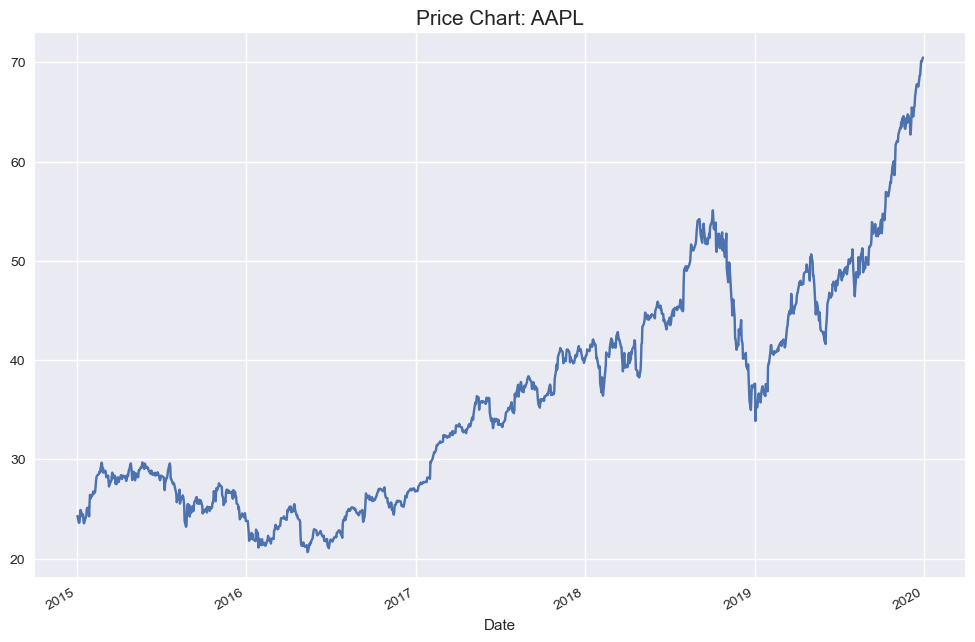

In [68]:
stock.plot_prices()

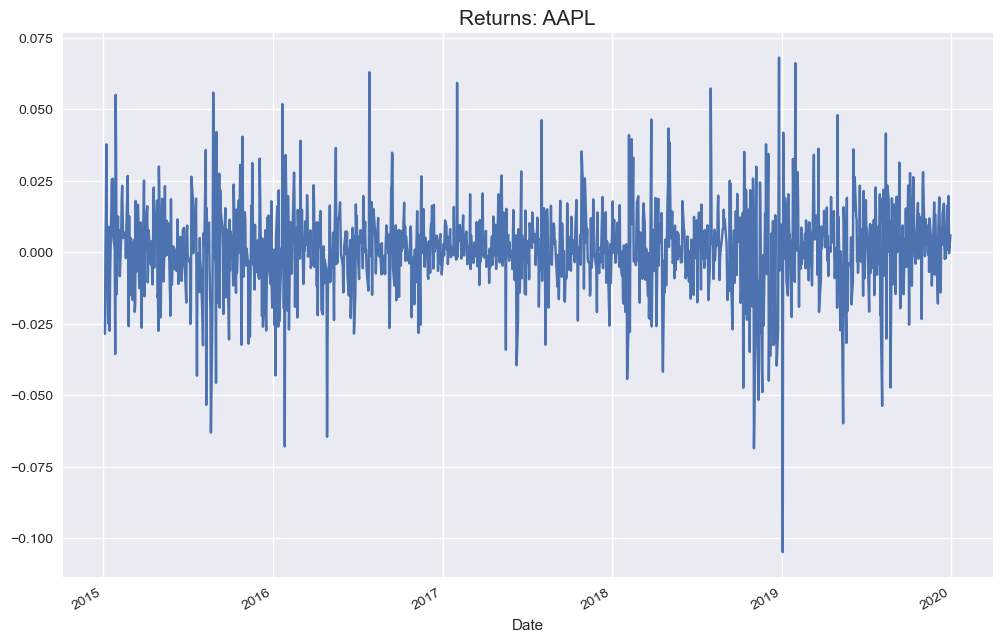

In [69]:
stock.plot_returns()

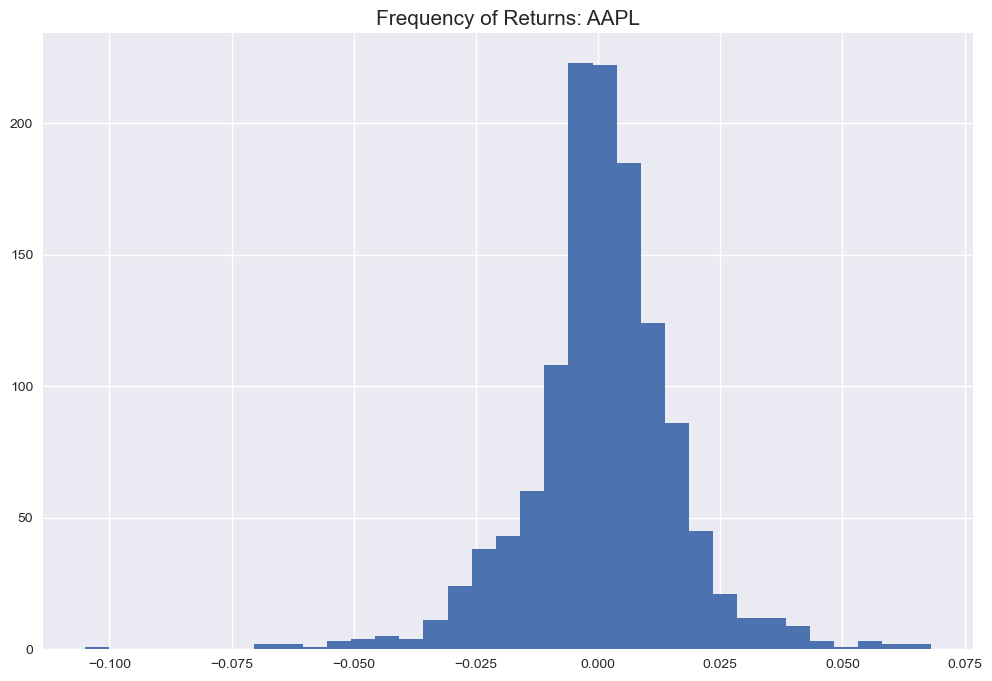

In [70]:
stock.plot_returns(kind = "hist")

## The FinancialInstrument Class live in action (Part 2)

__More Methods__

In [71]:
stock.mean_return()

0.0008482528799294191

In [72]:
stock.data.log_returns.mean()

0.0008482528799294191

In [73]:
stock.mean_return(freq = "W") # NEW - replace w by W

0.004082013858970681

In [74]:
stock.std_returns()

0.015676743664684963

In [75]:
stock.std_returns(freq = "W") # NEW - replace w by W

0.03472981849221153

In [76]:
stock.annualized_perf()

Return: 0.214 | Risk: 0.249


In [77]:
stock.set_ticker("ENR")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/424241570.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [78]:
stock.ticker

'ENR'

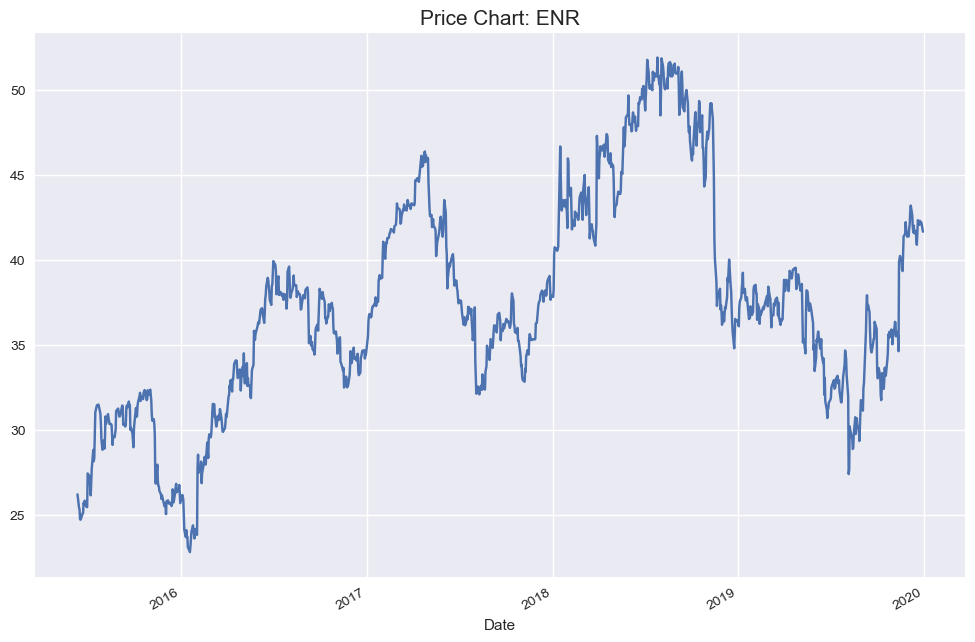

In [79]:
stock.plot_prices()

In [80]:
stock.annualized_perf()

Return: 0.102 | Risk: 0.324


In [81]:
enr_stock = FinancialInstrument(ticker="ENR.DE", start="2020-01-01", end="2025-06-30")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/424241570.py:46: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [82]:
enr_stock.ticker

'ENR.DE'

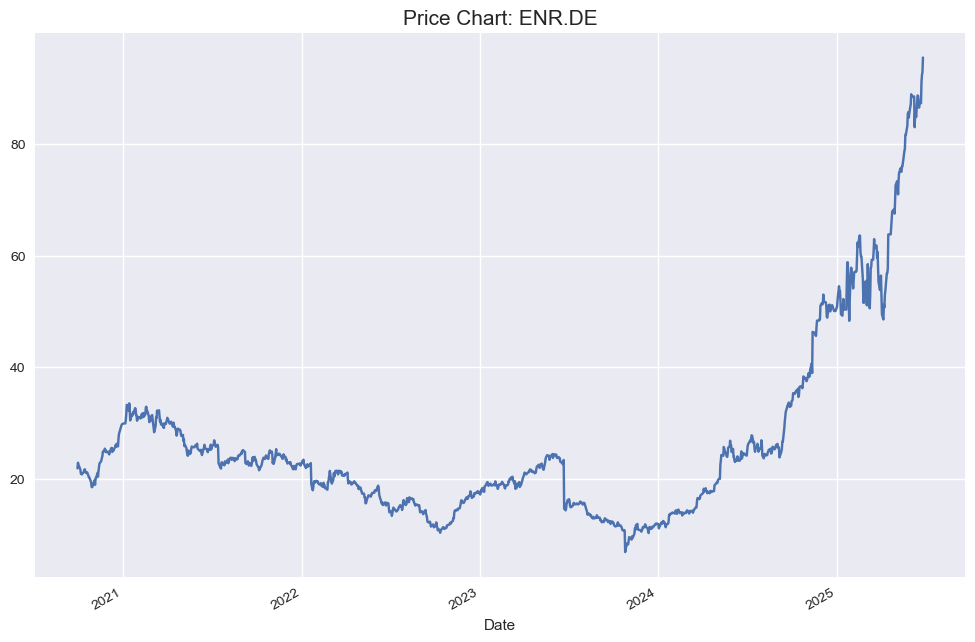

In [83]:
enr_stock.plot_prices()

## Building the FinancialInstrument Class from scratch: Instantiation

In [85]:
class FinancialInstrument():
    pass
    #attributes
    #methods

In [86]:
stock = FinancialInstrument() # instantiation

In [87]:
stock

In [91]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [92]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31") # instantiation

In [93]:
stock

In [94]:
stock.ticker

'AAPL'

In [95]:
stock.end

'2019-12-31'

In [96]:
stock.start

'2015-01-01'

## The method get_data()

In [97]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [ ]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close#.to_frame() # old

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/2371780340.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download("AAPL", "2015-01-01", "2019-12-31").Close#.to_frame()
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015-01-02,24.288584
2015-01-05,23.604332
2015-01-06,23.606552
2015-01-07,23.937572
2015-01-08,24.857304
...,...
2019-12-23,68.667610
2019-12-24,68.732887
2019-12-26,70.096573


In [112]:
raw = yf.download("AAPL", "2015-01-01", "2019-12-31", multi_level_index = False).Close.to_frame() # new from yfinance 0.2.48

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/609541227.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download("AAPL", "2015-01-01", "2019-12-31", multi_level_index = False).Close.to_frame() # new from yfinance 0.2.48
[*********************100%***********************]  1 of 1 completed


In [113]:
raw.rename(columns = {"Close":"price"}, inplace = True)

In [114]:
raw

,price
Date,
2015-01-02,24.288584
2015-01-05,23.604332
2015-01-06,23.606552
2015-01-07,23.937572
2015-01-08,24.857304
...,...
2019-12-23,68.667610
2019-12-24,68.732887
2019-12-26,70.096573


In [115]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

In [116]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/156962179.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [117]:
stock.ticker

'AAPL'

In [118]:
stock.data

,price
Date,
2015-01-02,24.288584
2015-01-05,23.604332
2015-01-06,23.606552
2015-01-07,23.937572
2015-01-08,24.857304
...,...
2019-12-23,68.667610
2019-12-24,68.732887
2019-12-26,70.096573


## The method log_returns()

In [119]:
stock.data

,price
Date,
2015-01-02,24.288584
2015-01-05,23.604332
2015-01-06,23.606552
2015-01-07,23.937572
2015-01-08,24.857304
...,...
2019-12-23,68.667610
2019-12-24,68.732887
2019-12-26,70.096573


In [120]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [121]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/1644076762.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [124]:
stock.data

,price,log_returns
Date,,
2015-01-02,24.288584,NaN
2015-01-05,23.604332,-0.028576
2015-01-06,23.606552,0.000094
2015-01-07,23.937572,0.013925
2015-01-08,24.857304,0.037702
...,...,...
2019-12-23,68.667610,0.016187
2019-12-24,68.732887,0.000950
2019-12-26,70.096573,0.019646


In [125]:
stock.log_returns()

## (String) Representation

In [126]:
stock

In [128]:
print(stock)

In [129]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [130]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/3880623625.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [131]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [ ]:
print(stock)

## The methods plot_prices() and plot_returns()

In [132]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [133]:
stock.data

,price,log_returns
Date,,
2015-01-02,24.288584,NaN
2015-01-05,23.604332,-0.028576
2015-01-06,23.606552,0.000094
2015-01-07,23.937572,0.013925
2015-01-08,24.857304,0.037702
...,...,...
2019-12-23,68.667610,0.016187
2019-12-24,68.732887,0.000950
2019-12-26,70.096573,0.019646


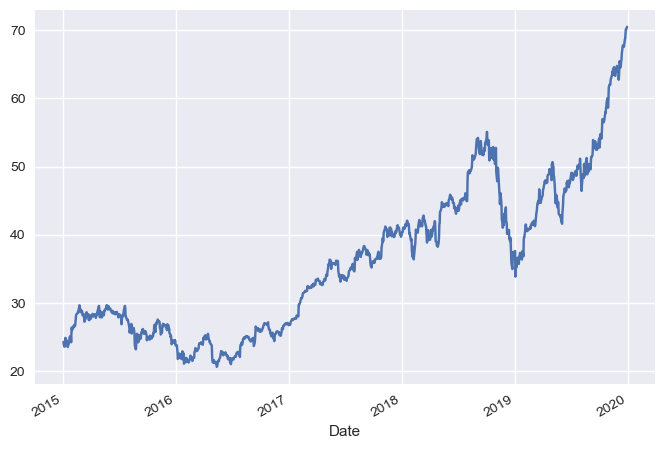

In [134]:
stock.data.price.plot()
plt.show()

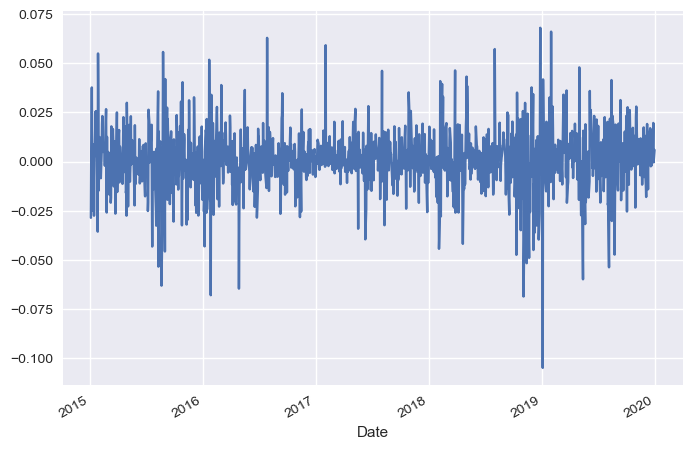

In [135]:
stock.data.log_returns.plot()
plt.show()

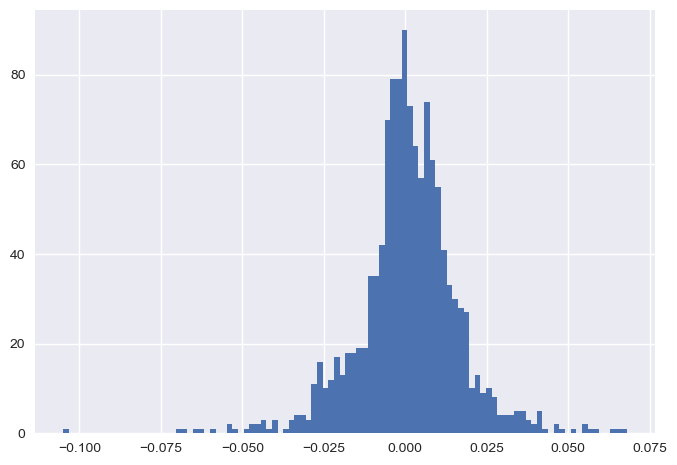

In [136]:
stock.data.log_returns.hist(bins = 100)
plt.show()

In [137]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)  

In [138]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/408373132.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


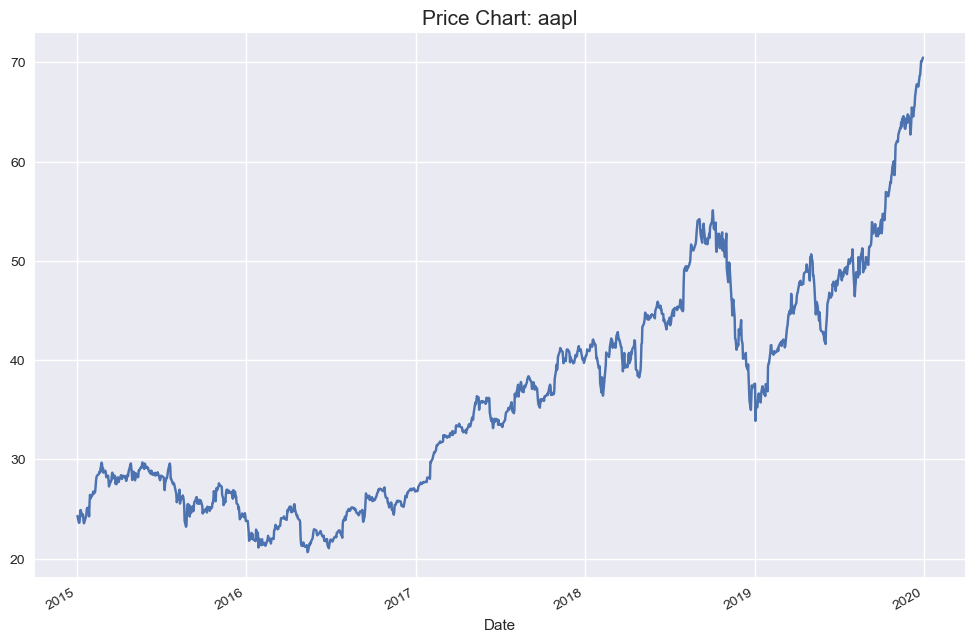

In [139]:
stock.plot_prices()

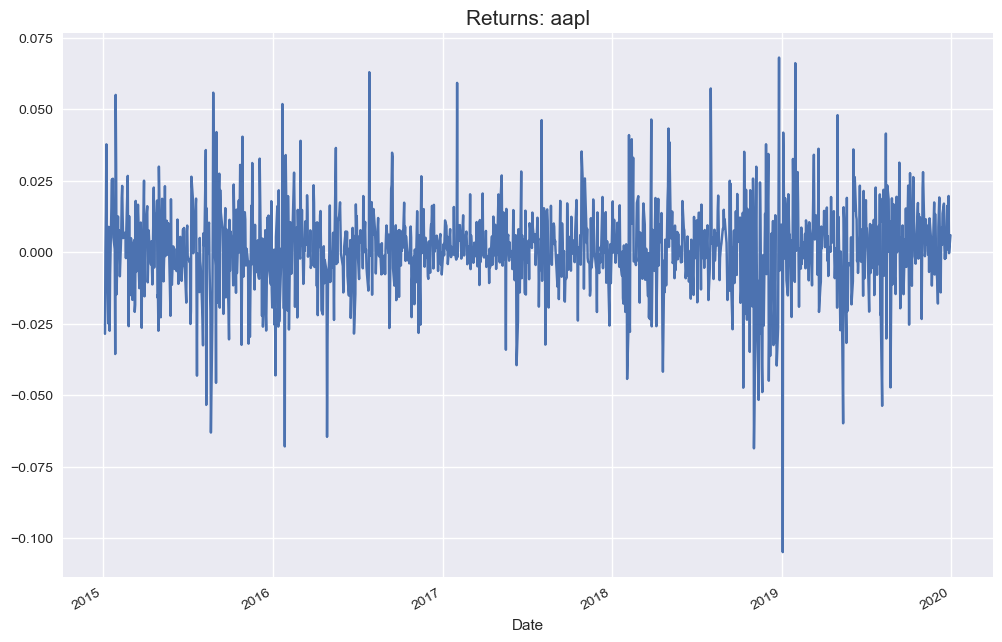

In [140]:
stock.plot_returns()

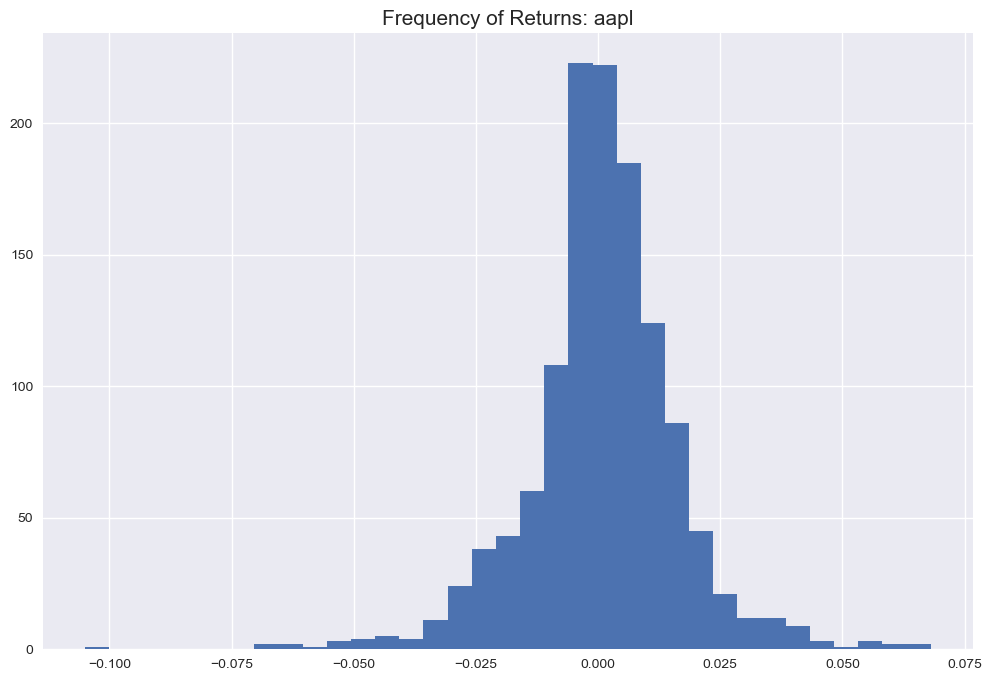

In [141]:
stock.plot_returns(kind = "hist")

## Encapsulation

In [142]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

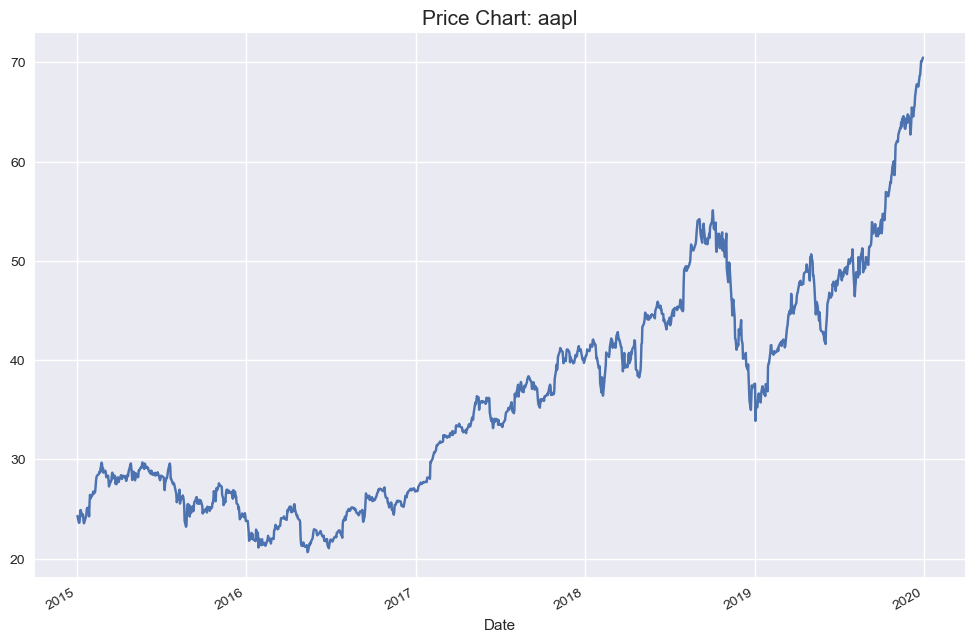

In [143]:
stock.plot_prices()

In [144]:
stock.ticker

'aapl'

In [145]:
stock.ticker = "GE"

In [146]:
stock.ticker

'GE'

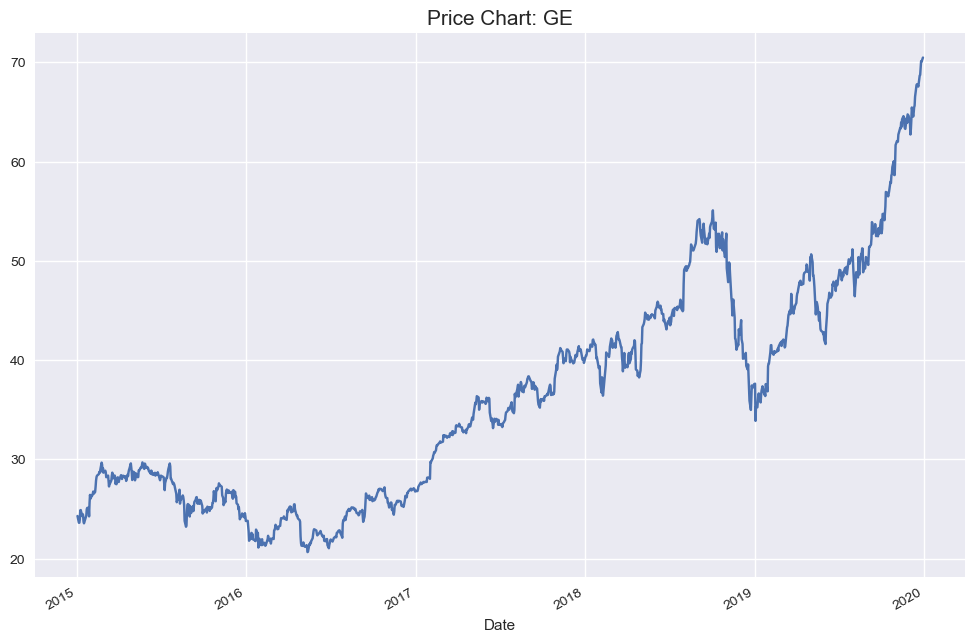

In [147]:
stock.plot_prices()

In [148]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)

In [149]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/3153959918.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [150]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

In [151]:
stock.ticker

AttributeError: 'FinancialInstrument' object has no attribute 'ticker'

In [152]:
stock.

SyntaxError: invalid syntax (1863568528.py, line 1)

In [153]:
stock._ticker

'aapl'

## The method set_ticker()

In [154]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [155]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/3794694595.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


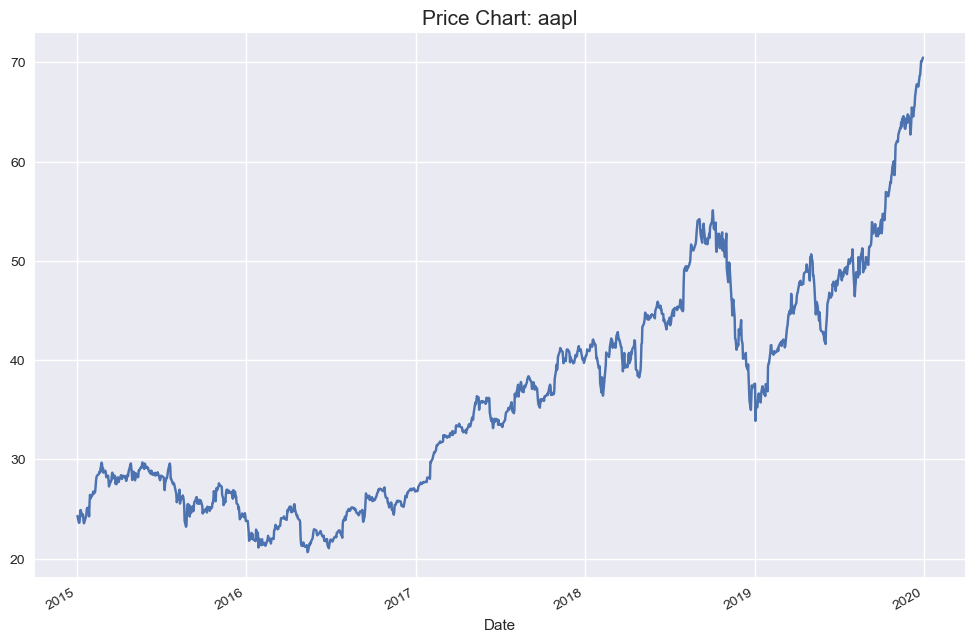

In [156]:
stock.plot_prices()

In [157]:
stock.set_ticker("GE")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/3794694595.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


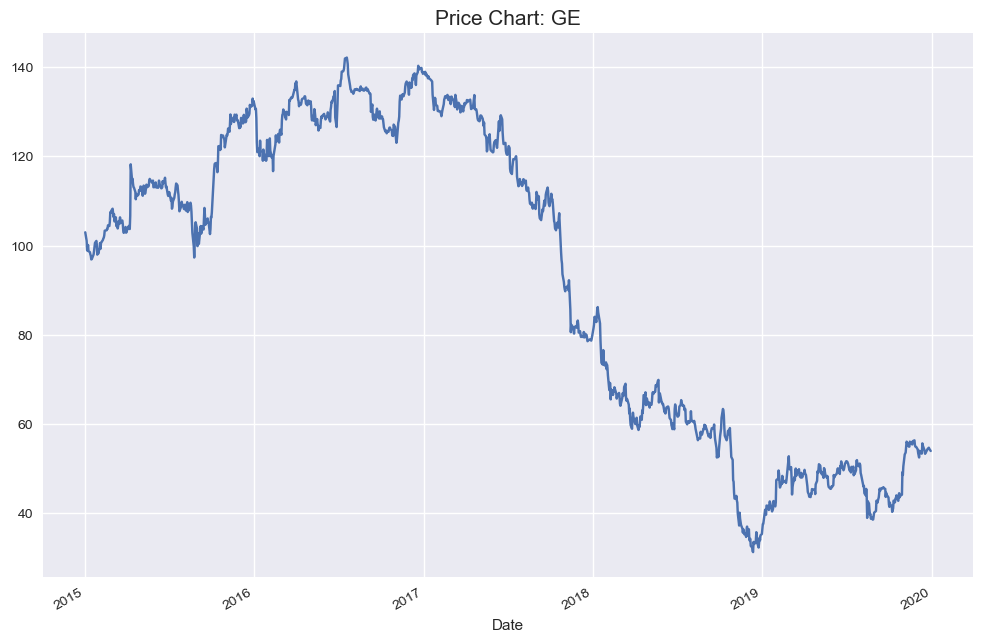

In [158]:
stock.plot_prices()

## Adding more methods and performance metrics

In [159]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [160]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/81312120.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [161]:
stock.mean_return()

0.0008482528799294191

In [162]:
stock.mean_return("W") # NEW - replace w by W

0.004082013858970681

In [163]:
stock.std_returns()

0.015676743664684963

In [164]:
stock.std_returns("YE") # NEW - replace a by YE

0.3020521334333048

In [165]:
stock.annualized_perf()

Return: 0.214 | Risk: 0.249


## Inheritance

In [166]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [167]:
class RiskReturn(FinancialInstrumentBase): # Child class ClassName(NameOfParent):
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [168]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/2940021569.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [169]:
stock.annualized_perf()

Return: 0.214 | Risk: 0.249


In [170]:
stock.data

,price,log_returns
Date,,
2015-01-02,24.288584,NaN
2015-01-05,23.604332,-0.028576
2015-01-06,23.606552,0.000094
2015-01-07,23.937572,0.013925
2015-01-08,24.857304,0.037702
...,...,...
2019-12-23,68.667610,0.016187
2019-12-24,68.732887,0.000950
2019-12-26,70.096573,0.019646


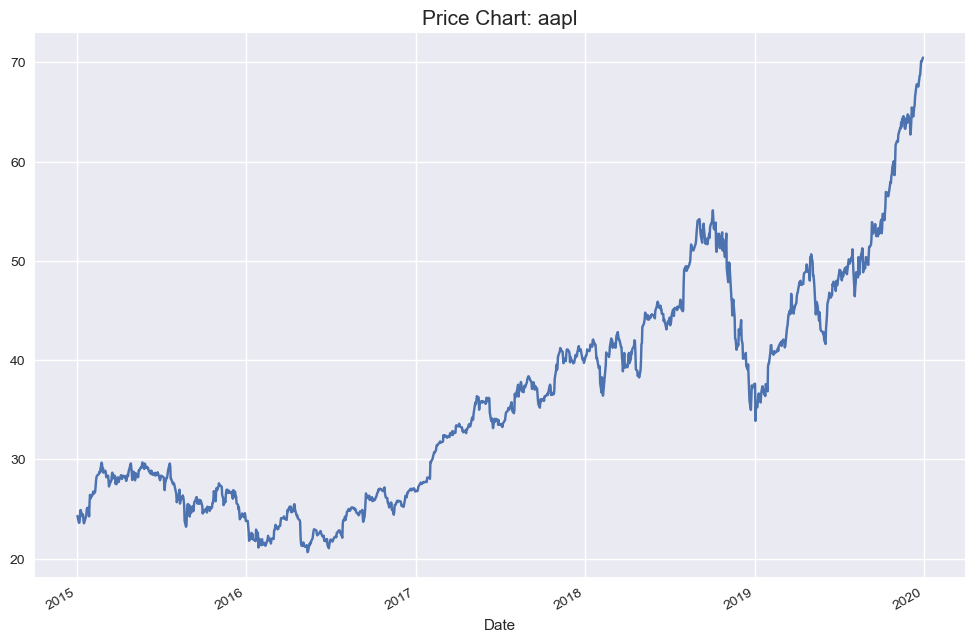

In [171]:
stock.plot_prices()

In [172]:
stock.set_ticker("ge")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/2940021569.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [173]:
stock

RiskReturn(ticker = ge, start = 2015-01-01, end = 2019-12-31)

In [174]:
stock.mean_return("W") # NEW - replace w by W

-0.0024790079367842193

## Inheritance and the super() Function

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

In [176]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker # define what the 'required elements' are
        self.start = start # define what the 'required elements' are
        self.end = end # define what the 'required elements' are
        self.get_data() # run this method in the initialisation of each object of this class
        self.log_returns() # run this method in the initialisation of each object of this class
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [177]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __init__(self, ticker, start, end, freq = None):
        self.freq = freq
        super().__init__(ticker, start, end)
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                          self.start, self.end)
    def mean_return(self):
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self):
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [178]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31", freq = "W")

/var/folders/gq/wf94nnj16zqczffkrs_xthph0000gn/T/ipykernel_57163/3942952298.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [179]:
stock.freq

'W'

In [180]:
stock._ticker

'aapl'

In [181]:
stock.data

,price,log_returns
Date,,
2015-01-02,24.288584,NaN
2015-01-05,23.604332,-0.028576
2015-01-06,23.606552,0.000094
2015-01-07,23.937572,0.013925
2015-01-08,24.857304,0.037702
...,...,...
2019-12-23,68.667610,0.016187
2019-12-24,68.732887,0.000950
2019-12-26,70.096573,0.019646


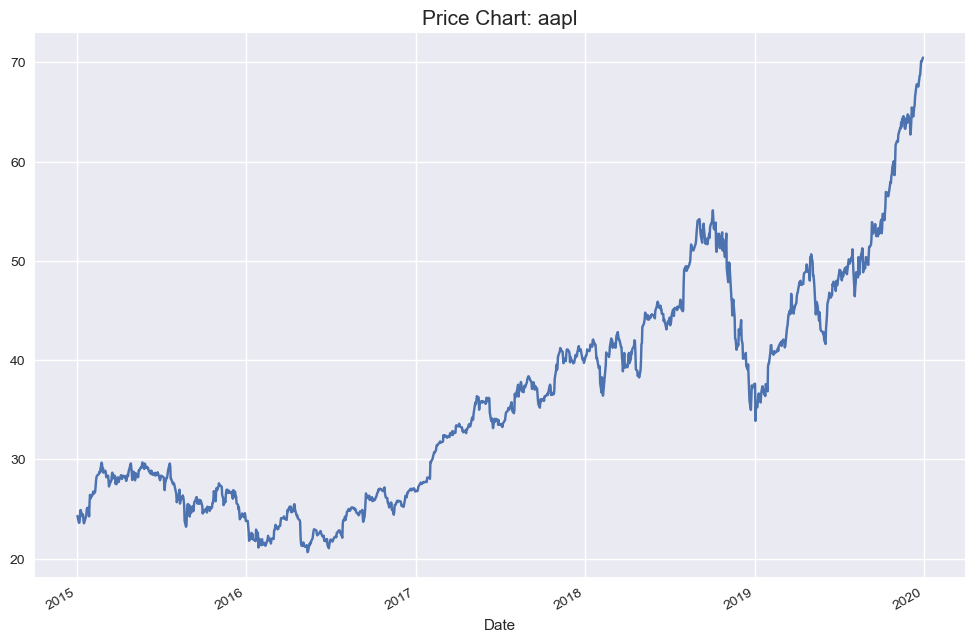

In [182]:
stock.plot_prices()

In [183]:
stock.mean_return()

0.004082013858970681

In [184]:
stock.annualized_perf()

Return: 0.214 | Risk: 0.249


## Docstrings

In [185]:
class FinancialInstrument():
    ''' Class to analyze Financial Instruments like stocks
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or as histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [ ]:
stock = FinancialInstrument

__Final Version__

In [186]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self._ticker, self.start, self.end, multi_level_index = False).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))